# Table of Contents 
- **[Python Data Visualization Landscape](#Python-Data-Visualization-Landscape)**
- **[Matplotlib: plotting examples](#Matplotlib:-plotting-examples)**
- **[Plotting with pandas](#Plotting-with-pandas)**
- **[Seaborn](#Seaborn)**
- **[Plotly Express: Interactive Plots](#Plotly-Express:-interactive-plots)**



# Python Data Visualization Landscape

**Data visualization** is one of the most important step in the data mining process.
The choice of the correct plot depends on three aspects:
- which data you are expected to plot
- what is the goal of the visualization 
- for whom the plot is intended

[Anaconda Blog](https://www.anaconda.com/blog/python-data-visualization-2018-why-so-many-libraries): Python Data Visualization 2018: Why So Many Libraries?

![dataviz](https://files.speakerdeck.com/presentations/a2d86983ff634ac3871ad4e5a308a67b/slide_32.jpg)

Most of the libraries fall into the "InfoVis" group, focusing on visualizations of information in arbitrary spaces, not necessarily the three-dimensional physical world. 

InfoVis libraries use the two dimensions of the printed page or computer screen to make abstract spaces interpretable, typically with axes and labels. The InfoVis libraries can be further broken down into numerous subgroups:
- **`Matplotlib`**: One of the oldest and by far the most popular of the InfoVis libraries, released in 2003, with a very extensive range of 2D plot types and output formats

- **Matplotlib-based**: A variety of tools have built on Matplotlib's 2D-plotting capability over the years, either using it as a rendering engine for a certain type of data or in a certain domain (`pandas`, `NetworkX`, `Cartopy`, `yt`, etc.), or providing a higher-level API on top to simplify plot creation (`ggplot`, `plotnine`, `HoloViews`, `GeoViews`), or extending it with additional types of plots (`seaborn`, etc.).
- **JavaScript**: Once HTML5 allowed rich interactivity in browsers, many libraries arose to provide interactive 2D plots for web pages and in Jupyter notebooks, either using custom JS (`Bokeh`, `Toyplot`) or primarily wrapping existing JS libraries like D3 (`Plotly`, `bqplot`).


The most basic plot types are shared between multiple libraries, but others are only available in certain libraries. 
- **Hint**: look at the example galleries for each library. 

As a rough guide:
- *Statistical plots* (scatter plots, lines, areas, bars, histograms): Covered well by nearly all InfoVis libraries, but are the main focus for Seaborn, bqplot, Altair, ggplot2, plotnine
- *Images, regular grids, rectangular meshes*: Well supported by Bokeh, Datashader, HoloViews, Matplotlib, Plotly
- *Irregular 2D meshes* (triangular grids): Well supported by the SciVis libraries plus Matplotlib, Bokeh, Datashader, HoloViews
- *Geographical data*: Matplotlib (with Cartopy), GeoViews, ipyleaflet, Plotly
- *Networks/graphs*: NetworkX, Plotly, Bokeh, HoloViews, Datashader
- *3D (meshes, scatter, etc.)*: Fully supported by the SciVis libraries, plus some support in Plotly, Matplotlib, HoloViews, and ipyvolume.

# Matplotlib: plotting examples

Recommended reading: [sample plots in Matplotlib](https://matplotlib.org/stable/gallery/index.html)

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:
* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control (programmatically) of every element in a figure, including figure size and DPI.
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.


In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
t = np.arange(0, 10, 0.1)
sin_t = np.sin(2 * np.pi * t / 5)
cos_t = np.cos(2 * np.pi * t / 5)

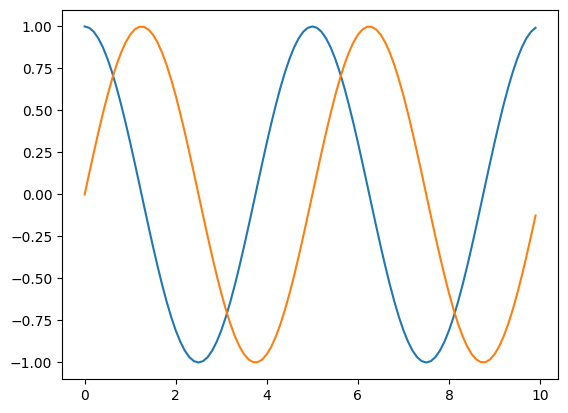

In [3]:
plt.plot(t, cos_t)
plt.plot(t, sin_t)
plt.show()

### Pyplot Functions

There are many `pyplot` functions available for us to customize our figures. For example:

| Fucntion | Description |
| ---: | :--- |
| `plt.xlim` | set $x$ limits |
| `plt.ylim` | set $y$ limits |
| `plt.grid` | add grid lines |
| `plt.title` | add a title |
| `plt.xlabel` | add label to the horizontal axis |
| `plt.ylabel` | add label to the vertical axis |
| `plt.axis` | set axis properties (`equal`, `off`, `scaled`, etc.) |
| `plt.xticks` | set tick locations on the horizontal axis |
| `plt.yticks` | set tick locations on the vertical axis |
| `plt.legend` | display legend for several lines in the same figure |
| `plt.savefig` | save figure (as .png, .pdf, etc.) to working directory |
| `plt.figure` | create a new figure and set its properties |

See the [pyplot documentation](https://matplotlib.org/api/pyplot_summary.html) for a full list of functions.

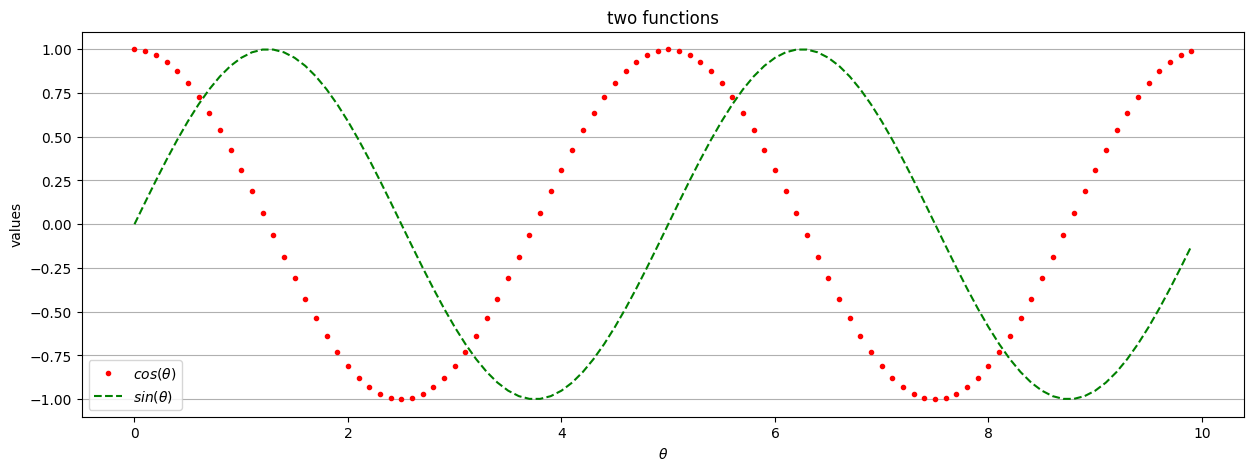

In [4]:
plt.figure(figsize = (15, 5)) 
# figsize is a tuple of the width and height of the figure in inches

plt.plot(t, cos_t, '.r', label = r"$cos(\theta)$") 
# ".r" is a format string which denotes linestyle=None, marker = '.' and color = 'red' 

plt.plot(t, sin_t, '--g', label = r"$sin(\theta)$")
# "--g" is a format string which denotes linestyle=dashed and color = 'green' 

plt.title('two functions')
plt.xlabel(r"$\theta$")
plt.ylabel('values')
plt.ylim([-1.1, 1.1])
plt.legend()
plt.grid(axis = 'y')

# plt.legend(loc = 0) # let matplotlib decide the optimal location
# plt.legend(loc = 1) # upper right corner
# plt.legend(loc = 2) # upper left corner
# plt.legend(loc = 3) # lower left corner
# plt.legend(loc = 4) # lower right corner
# # .. many more options are available

plt.savefig(os.path.join('out', 'example_figure.png'), format = 'png')
plt.show()

#### Colors

| Character | Color |
| :---: | :---: |
| `b` | blue |
| `g` | green |
| `r` | red |
| `c` | cyan |
| `m` | magenta |
| `y` | yellow |
| `k` | black |
| `w` | white |


#### Markers

| Character | Marker |
| :---: | :---: |
| `.` | point |
| `o` | circle |
| `v` | triangle down |
| `^` | triangle up |
| `s` | square |
| `p` | pentagon |
| `*` |	star |
| `+` | plus |
| `x` |	x |
| `D` | diamond |

#### Line Styles

| Character | Line Style |
| :---: | :---: |
| `-` | solid line style |
| `--` | dashed line style |
| `-.` | dash-dot line style |
| `:` | dotted line style |

See the [matplotlib.pyplot.plot documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for more options.

### Subplots

We start by storing a reference to the newly created figure instance and the axes array in the `f` and `axarr` variables, respectively

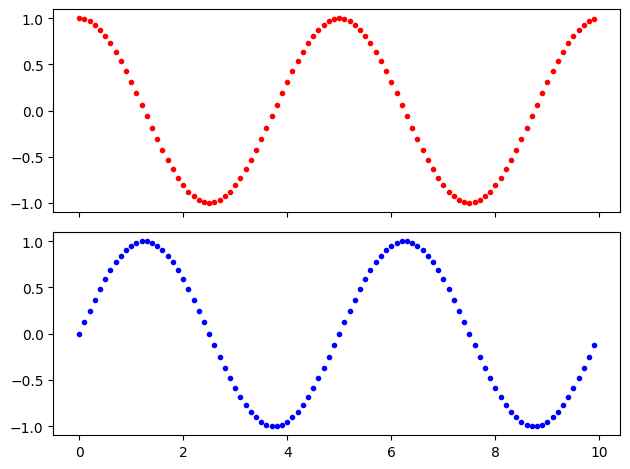

In [5]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex = True) 
axarr[0].plot(t, cos_t, '.r')
axarr[1].plot(t, sin_t, '.b')
plt.tight_layout()
plt.show()

# Plotting with pandas

Pandas builds on top of Matplotlib but exploits the knowledge included in Dataframes to improve the default output. 

Check the [user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)


In [6]:
composers_df = pd.read_excel('dataset/composers.xlsx', sheet_name = 'Sheet5')
composers_df = composers_df.dropna()
composers_df

composer  birth   death         period  country
0         Mahler   1860  1911.0  post-romantic  Austria
1      Beethoven   1770  1827.0       romantic  Germany
2        Puccini   1858  1924.0  post-romantic    Italy
3   Shostakovich   1906  1975.0         modern   Russia
4          Verdi   1813  1901.0       romantic    Italy
5         Dvorak   1841  1904.0       romantic  Czechia
6       Schumann   1810  1856.0       romantic  Germany
7     Stravinsky   1882  1971.0         modern   Russia
8       Sibelius   1865  1957.0  post-romantic  Finland
9          Haydn   1732  1809.0        classic  Austria
10        Mozart   1756  1791.0        classic  Austria
11      Messiaen   1908  1992.0         modern   France
12     Prokofiev   1891  1953.0         modern   RUssia
13    Monteverdi   1567  1643.0    renaissance    Italy
14       Haendel   1685  1759.0        baroque  Germany
15        Brahms   1833  1897.0       romantic  Germany
16       Purcell   1659  1695.0        baroque  England
17   Charpentier   1643  1704.0        baroque   France
18      Bruckner   1824  1896.0  post-romantic  Austria
19          Berg   1885  1935.0         modern  Austria
20      Couperin   1626  1661.0        baroque   France
21        Rameau   1683  1764.0        baroque   France
22       Berlioz   1803  1869.0       romantic   France
23        Gounod   1818  1893.0       romantic   France
24      Massenet   1842  1912.0       romantic   France
25        Boulez   1925  2016.0         modern   France
26    Palestrina   1525  1594.0    renaissance    Italy
27      Gesualdo   1566  1613.0    renaissance    Italy
28       Caldara   1670  1736.0        baroque    Italy
29     Pergolesi   1710  1736.0        baroque    Italy
30     Scarlatti   1685  1757.0        baroque    Italy
31       Caccini   1587  1640.0        baroque    Italy
32      Cimarosa   1749  1801.0        classic    Italy
33     Donizetti   1797  1848.0       romantic    Italy
34   Leoncavallo   1858  1919.0       romantic    Italy
35       Bellini   1801  1835.0       romantic    Italy
36         Dufay   1397  1474.0    renaissance  Belgium
37        Lassus   1532  1594.0    renaissance  Belgium
38       Borodin   1833  1887.0       romantic   Russia
39   Mussorsgsky   1839  1881.0       romantic   Russia
40         Soler   1754  1806.0        classic    Spain
41       Albeniz   1860  1909.0       romantic    Spain
42      Granados   1867  1916.0       romantic    Spain
43       Dowland   1563  1626.0    renaissance  England
44          Byrd   1540  1623.0    renaissance  England
45        Walton   1902  1983.0         modern  England
47          Bach   1685  1750.0        baroque  Germany
48        Wagner   1813  1883.0       romantic  Germany
49       Strauss   1864  1949.0  post-romantic  Germany
50          Orff   1895  1982.0         modern  Germany
51         Dusek   1731  1799.0        classic  Czechia
52       Smetana   1824  1884.0       romantic  Czechia
53       Janacek   1854  1928.0         modern  Czechia
54       Copland   1900  1990.0         modern      USA
55     Bernstein   1918  1990.0         modern      USA

In [7]:
composers_df.head()

composer  birth   death         period  country
0        Mahler   1860  1911.0  post-romantic  Austria
1     Beethoven   1770  1827.0       romantic  Germany
2       Puccini   1858  1924.0  post-romantic    Italy
3  Shostakovich   1906  1975.0         modern   Russia
4         Verdi   1813  1901.0       romantic    Italy

- The `plot` method on `Series` and `DataFrame` is just a simple wrapper around `plt.plot()`

<Axes: >

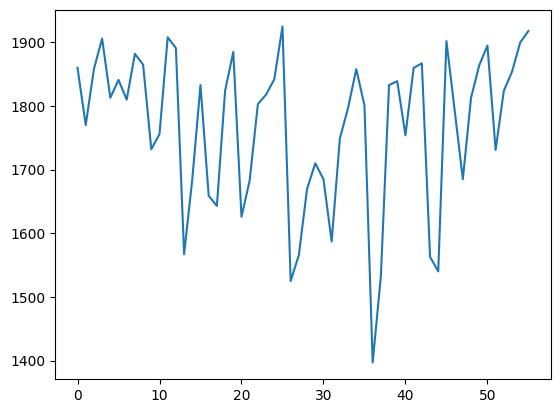

In [8]:
composers_df.birth.plot()

- On DataFrame, `plot()` is a convenience to plot all of the columns with labels

<Axes: >

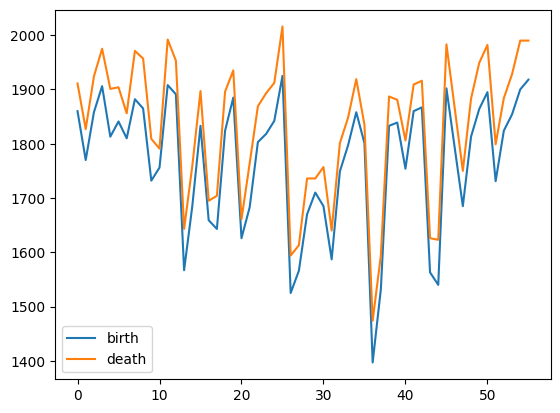

In [9]:
composers_df.plot()

- Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the `kind` keyword argument to `plot()`, and include:

| kind | plot |
| :---: | :---: |
| `bar` / `barh` | bar plots |
| `hist` | histogram |
| `box` | boxplot |
| `kde` or `density` | density plot |
| `area` | area plots |
| `scatter` | scatter plots |
| `hexbin` | hexagonal bin plots |
| `pie` | pie plots |

- example of scatter plot

<Axes: xlabel='birth', ylabel='death'>

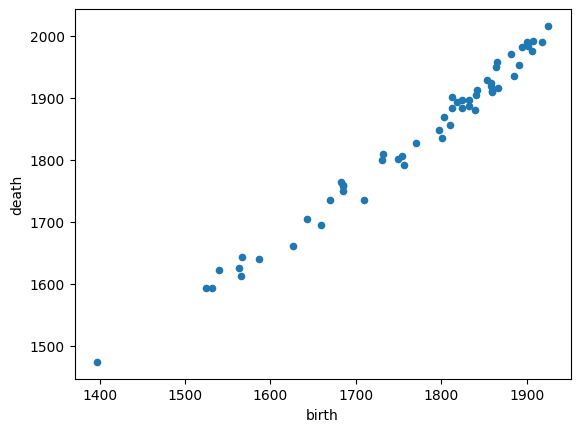

In [10]:
composers_df.plot(kind = 'scatter', x = 'birth', y = 'death')

- example of scatter plot with customization

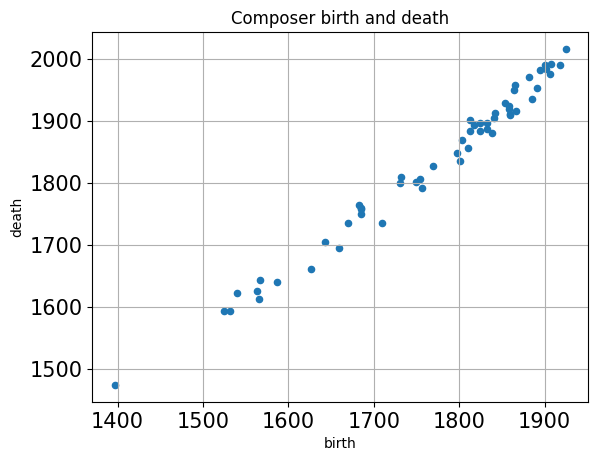

In [11]:
composers_df.plot(kind = 'scatter', 
                  x = 'birth', 
                  y = 'death',
                  title = 'Composer birth and death',
                  grid = True,
                  fontsize = 15)
plt.show()

- example of histogram plot

<Axes: ylabel='Frequency'>

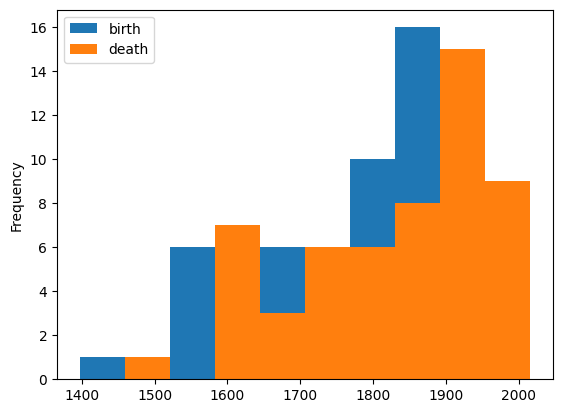

In [12]:
composers_df.plot(kind = 'hist')

We can appreciate the advantage of using Pandas: without specifying anything, Pandas made a histogram of the two numeric columns, labelled the axis and even added a legend to the plot.


We can definitely improve visualization by adding transparency!

<Axes: ylabel='Frequency'>

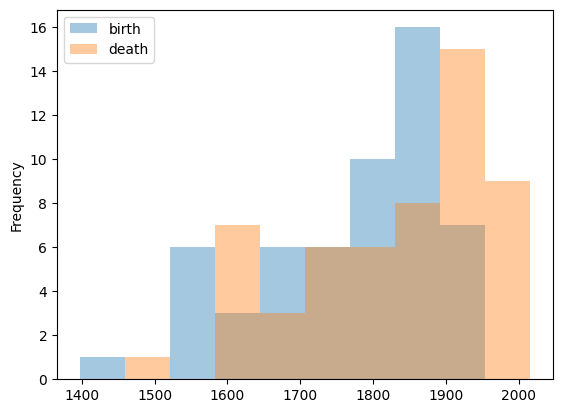

In [13]:
composers_df.plot(kind = 'hist', alpha = 0.4)

- We can also ask for subplots


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

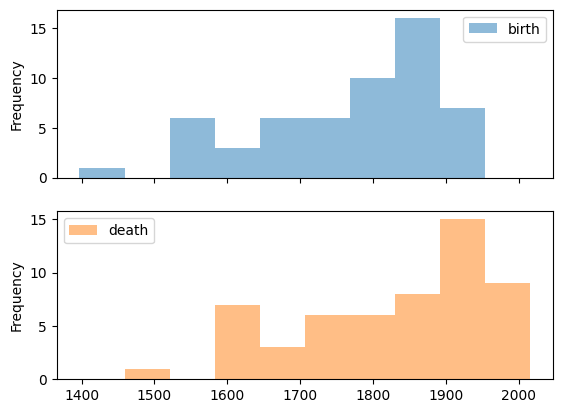

In [14]:
composers_df.plot.hist(subplots = True, alpha = 0.5)  


- example of boxplot

<Axes: >

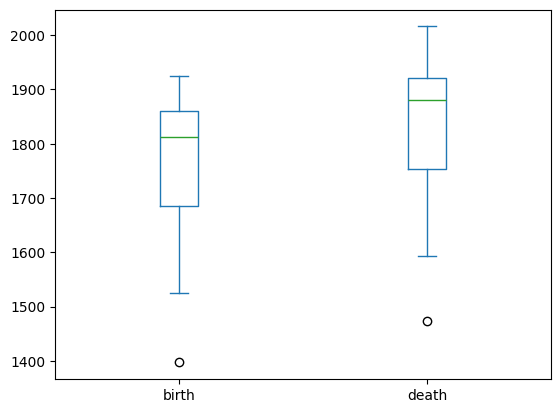

In [15]:
composers_df.plot(kind = 'box')

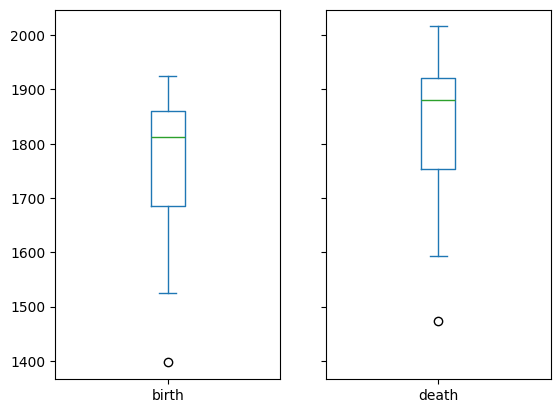

In [16]:
composers_df.plot(kind = 'box', 
                  subplots = True, 
                  sharey = True)
plt.show()

In [17]:
composers_df.groupby('period').mean('numeric_only')

birth        death
period                                 
baroque        1663.300000  1720.200000
classic        1744.400000  1801.200000
modern         1896.909091  1974.090909
post-romantic  1854.200000  1927.400000
renaissance    1527.142857  1595.285714
romantic       1824.823529  1883.588235

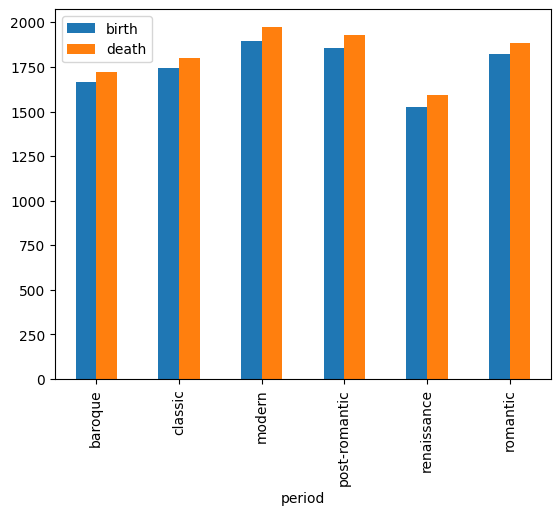

In [18]:
composers_df.groupby('period').mean('numeric_only').plot(kind = 'bar')
plt.show()

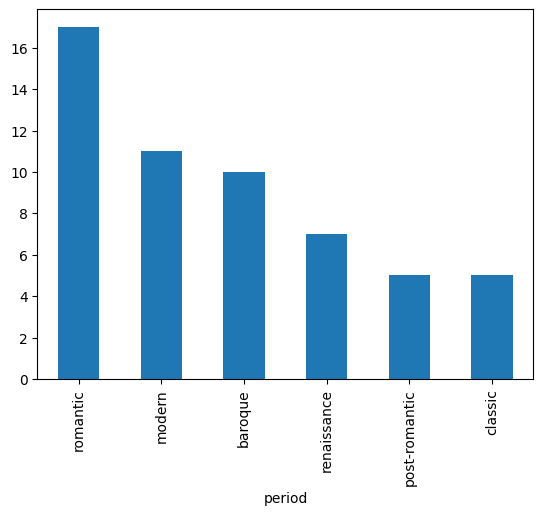

In [19]:
composers_df['period'].value_counts().plot(kind = "bar")
plt.show()

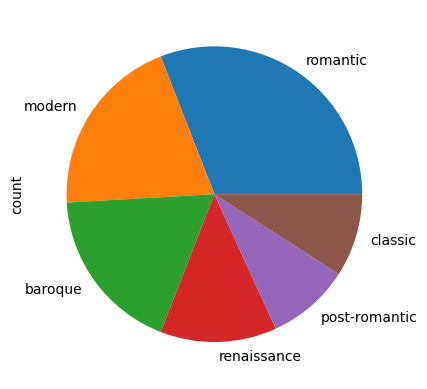

In [20]:
composers_df['period'].value_counts().plot(kind = "pie")
plt.show()

# Seaborn

See the [overview](https://seaborn.pydata.org/tutorial/function_overview.html) and the [example gallery](https://seaborn.pydata.org/examples/index.html) for an overview on seaborn plotting options.

Seaborn is tightly integrated with matplotlib.

While you can be productive using only seaborn functions, full customization of your graphics will require some knowledge of matplotlib’s concepts and API. 

High quality data visualization products can be obtained by combining the two:
- **Seaborn** provides a powerful high-level interface for creating visually appealing plots quickly
- **Matplotlib** provides deep customizability 



In [21]:
import seaborn as sns

- example of `lmplot`: plot data and <ins>L</ins>inear <ins>M</ins>odel regression fits

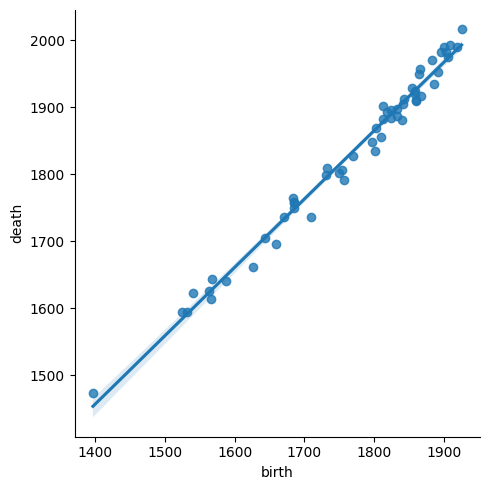

In [22]:
g = sns.lmplot(x = "birth", y = "death", data = composers_df)

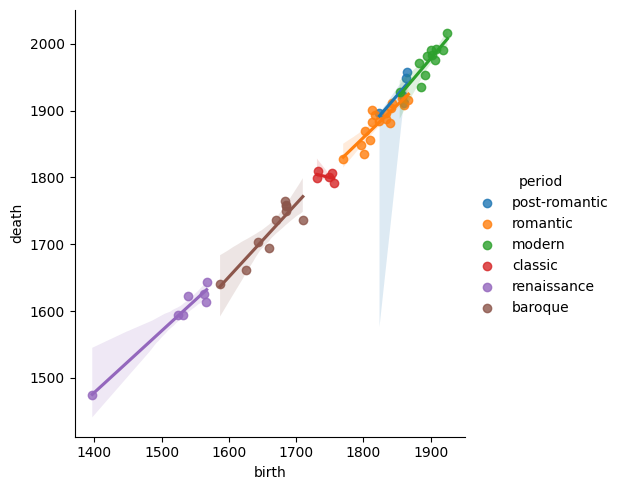

In [23]:
g = sns.lmplot(x = "birth", y = "death", data = composers_df, hue = "period") 
# hue = Grouping variable that will produce points with different colors

- example of `jointplot`: Draw a plot of two variables with bivariate and univariate graphs.


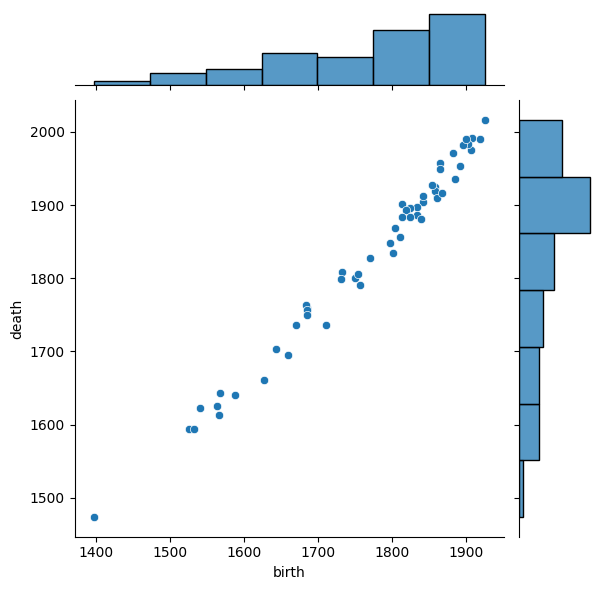

In [24]:
g = sns.jointplot(x = "birth", y = "death", data = composers_df)

Assigning a hue variable will add conditional colors to the scatterplot and draw separate density curves on the marginal axes:

internally, it uses `kdeplot()`: it plots univariate or bivariate distributions using kernel density estimation.
- A **kernel density estimate** (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.


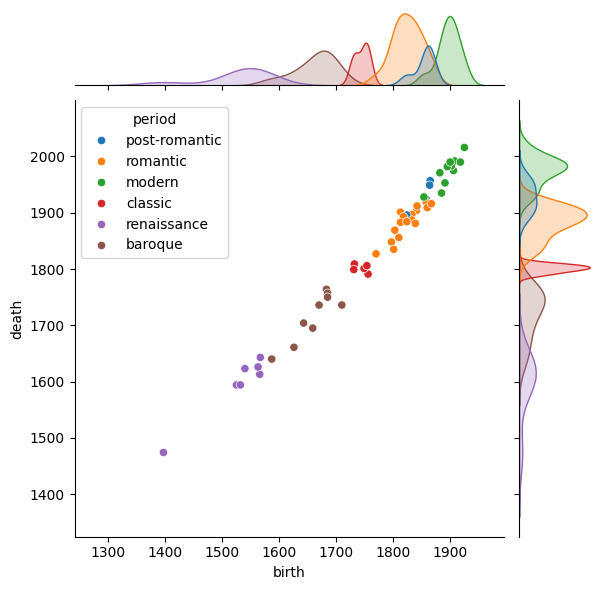

In [25]:
g = sns.jointplot(x = "birth", y = "death", hue = "period", data = composers_df)

In [26]:
composers_df['age'] = composers_df['death'] - composers_df['birth']

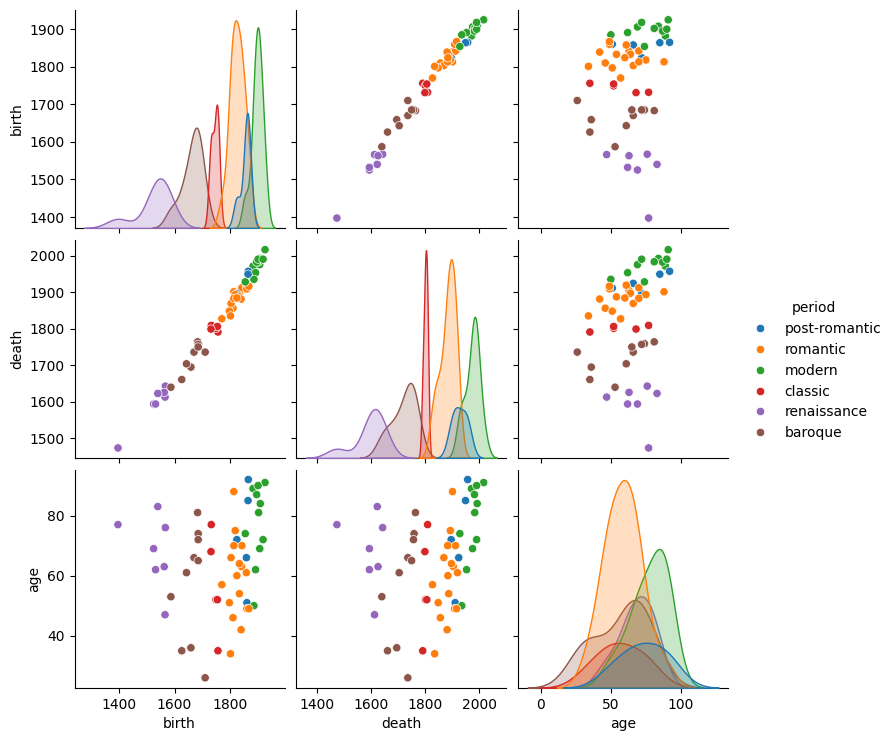

In [27]:
sns.pairplot(data = composers_df, hue = 'period')
plt.show()

#### Categorical Data

`seaborn` axes-level functions for [plotting categorical data](https://seaborn.pydata.org/tutorial/categorical.html):
- categorical scatter plots
    - `stripplot()`
    - `swarmplot()`
- distribution plots
    - `boxplot()`
    - `violinplot()`
    - `boxenplot()`
- estimate plots
    - `pointplot()`
    - `barplot()`
    - `countplot()`

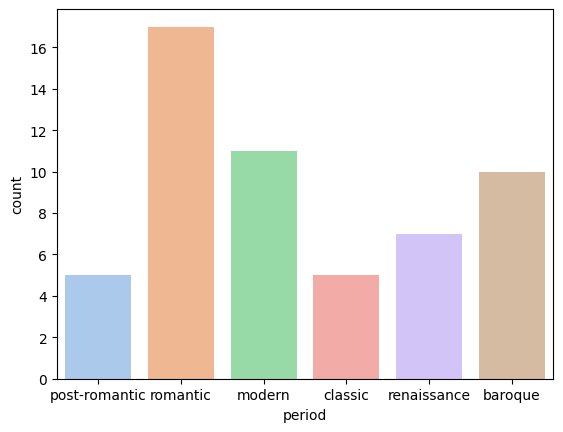

In [28]:
sns.countplot(x = 'period', data = composers_df, hue = 'period', palette = "pastel")
plt.show()

`seaborn` also provides a figure-level interface, `catplot()`, that gives unified higher-level access to the axes-level functions.

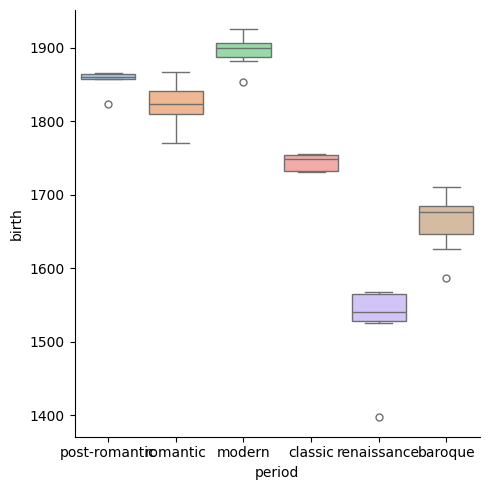

In [29]:
sns.catplot(x = "period", 
            y = 'birth', 
            kind = "box", 
            hue = 'period',
            palette = "pastel",
            data = composers_df)

# Plotly Express: interactive plots

[Plotly Express](https://plotly.com/python/plotly-express/) is a terse, consistent, high-level API for creating figures. 

In [30]:
import plotly.express as px

ImportError? Install it!
```bash
conda install -c plotly plotly_express
```

In [31]:
df = px.data.iris()
df

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

- example of scatter plot

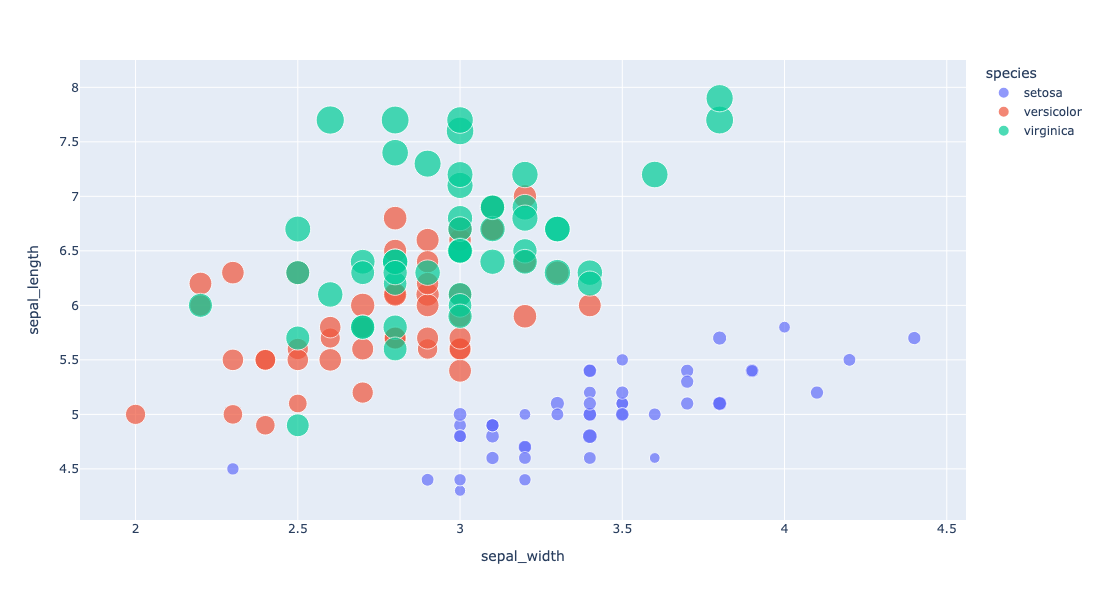

In [32]:
fig = px.scatter(df, 
                 x="sepal_width", 
                 y="sepal_length", 
                 color="species",
                 size='petal_length', 
                 hover_data=['petal_width'],
                 height=600
                )
fig.show()

Lets add a dimension!
- example of 3D scatter plot

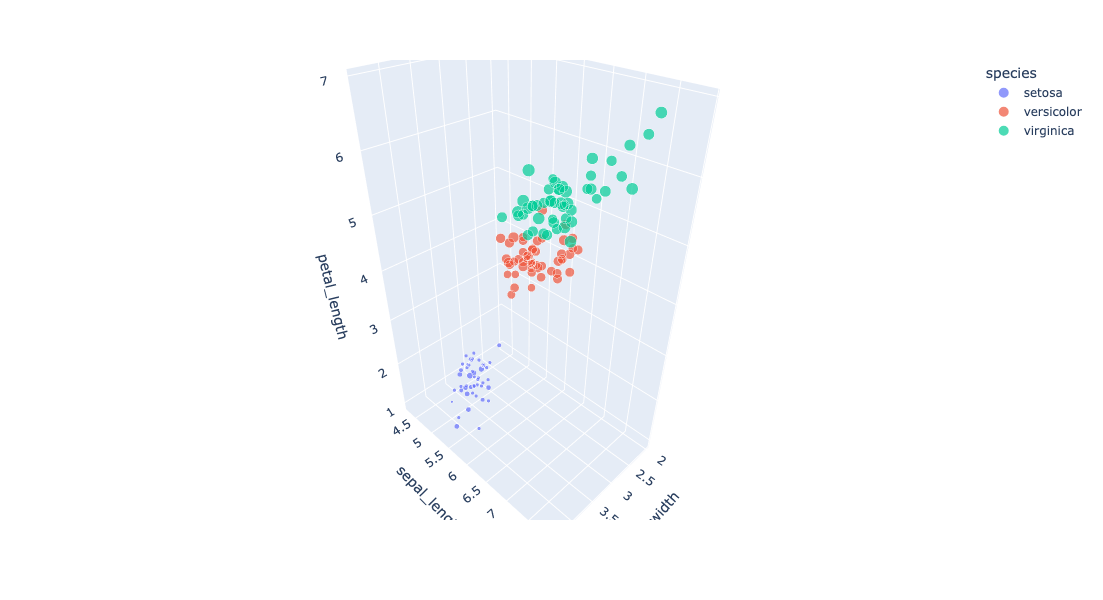

In [33]:
fig = px.scatter_3d(df, 
                    x="sepal_width", 
                    y="sepal_length", 
                    z="petal_length", 
                    size="petal_width",
                    color="species",
                    height=600)
fig.show()

In [34]:
df

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

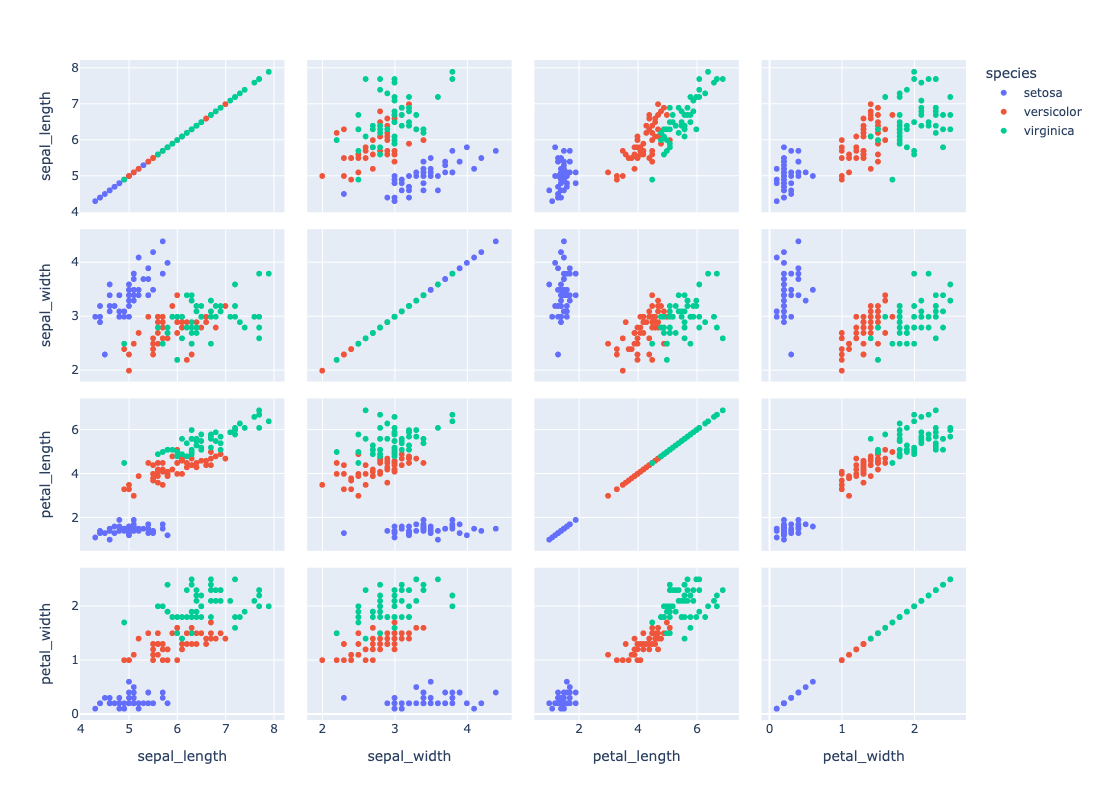

In [35]:
fig = px.scatter_matrix(df.drop(['species_id'], 
                                axis = 1),
                        dimensions = df.drop(['species_id', 'species'], axis = 1),
                        color = 'species',
                        height = 800,
                        width = 1000) 
fig.show()

- example of pie chart

In [36]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, 
             values = 'pop', 
             names = 'country', 
             title = 'Population of European continent', 
             height = 600)
fig.show()

- example of sunburst charts

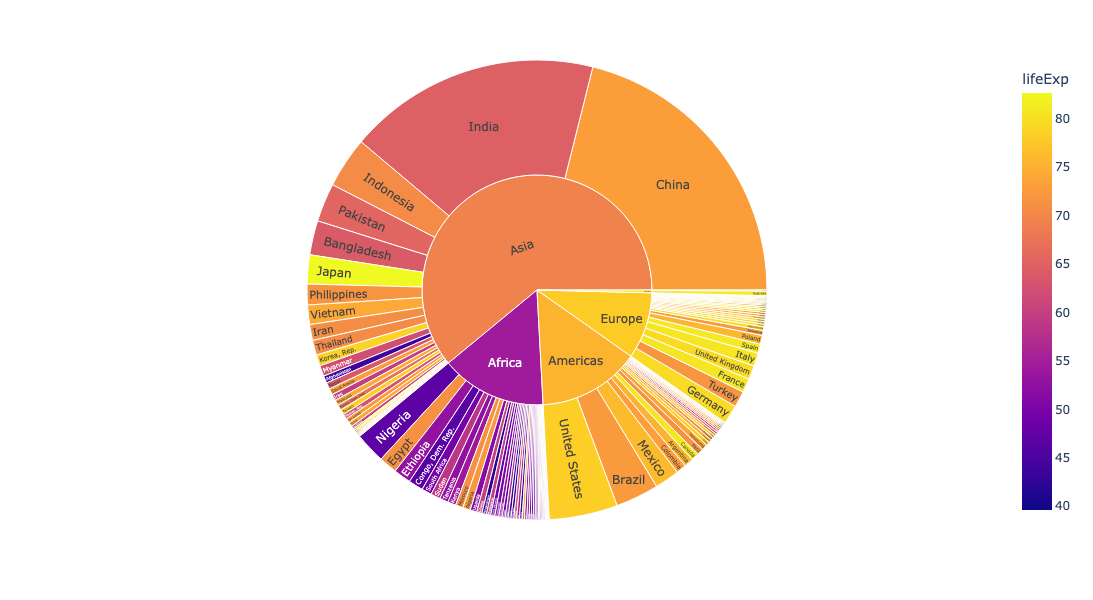

In [37]:
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, 
                  path = ['continent', 'country'], 
                  values = 'pop',
                  color = 'lifeExp', 
                  hover_data = ['iso_alpha'], 
                  height = 600)
fig.show()

- example of GeoJSON maps

In [38]:
df = px.data.election()
df

district  Coderre  Bergeron  \
0                                  101-Bois-de-Liesse     2481      1829   
1                               102-Cap-Saint-Jacques     2525      1163   
2                                11-Sault-au-Récollet     3348      2770   
3                                        111-Mile-End     1734      4782   
4                                      112-DeLorimier     1770      5933   
5                                    113-Jeanne-Mance     1455      3599   
6                                    12-Saint-Sulpice     3252      2521   
7                          121-La Pointe-aux-Prairies     5456      1760   
8                             122-Pointe-aux-Trembles     4734      1879   
9                            123-Rivière-des-Prairies     5737       958   
10                                        13-Ahuntsic     2979      3430   
11                                  131-Saint-Édouard     1827      6408   
12                             132-Étienne-Desmarteau     2331      5748   
13                                 133-Vieux-Rosemont     2670      4962   
14                                 134-Marie-Victorin     3673      3155   
15                           14-Bordeaux-Cartierville     3612      1554   
16                                 141-Côte-de-Liesse     4308      1320   
17                                 142-Norman-McLaren     4104      1459   
18                              151-Saint-Léonard-Est     3931       882   
19                            152-Saint-Léonard-Ouest     5387      1184   
20  161-Saint-HenriPetite-BourgognePointe-Saint-Ch...     2432      3368   
21                                162-Saint-PaulÉmard     2566      2092   
22                      171-ChamplainL'Île-des-Soeurs     3347      2562   
23                           172-Desmarchais-Crawford     2476      2631   
24                                   181-Peter-McGill     1451       754   
25                                  182-Saint-Jacques     1906      2169   
26                                   183-Sainte-Marie     1347      2827   
27                                   191-Saint-Michel     3668       984   
28                              192-François-Perrault     2878      2666   
29                                       193-Villeray     2201      5819   
30                                 194-Parc-Extension     2420      1793   
31                                           21-Ouest     2184       691   
32                                             22-Est     1589       708   
33                                          23-Centre     2526       851   
34                                      31-Darlington     1873      1182   
35                                 32-Côte-des-Neiges     1644      1950   
36                                         33-Snowdon     1548      1503   
37                             34-Notre-Dame-de-Grâce     1773      2653   
38                                          35-Loyola     2040      1437   
39                                        41-du Canal     1165       832   
40                                42-J.-Émery-Provost     1193       653   
41                                    43-Fort-Rolland     1325      1205   
42                               51-Sault-Saint-Louis     4201      1642   
43                                 52-Cecil-P.-Newman     3536      1330   
44                                 61-Pierre-Foretier      631       258   
45                            62-Denis-Benjamin-Viger      595       226   
46                                  63-Jacques-Bizard      518       224   
47                                64-Sainte-Geneviève      332       131   
48                                  71-Tétreaultville     3694      2589   
49                        72-MaisonneuveLongue-Pointe     2746      3250   
50                                       73-Hochelaga     1546      3679   
51                                      74-Louis-Riel     3509      2178   
52               

In [39]:
geojson = px.data.election_geojson()
geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.6363215300962, 45.5759177646435],
       [-73.6362833815582, 45.5758266113331],
       [-73.6446417578686, 45.5658132919643],
       [-73.6453511352974, 45.5647725775888],
       [-73.648867564748, 45.5586898267402],
       [-73.6513170845065, 45.5545659435652],
       [-73.6515658357324, 45.5554439857955],
       [-73.6660837831645, 45.5596724837829],
       [-73.6706609041685, 45.5610978251999],
       [-73.6676019919116, 45.5632340862888],
       [-73.6645385824068, 45.5642716484367],
       [-73.663663123697, 45.5654269638586],
       [-73.663336397858, 45.5666288247853],
       [-73.6637764768649, 45.5678900619231],
       [-73.6625073244826, 45.5688479494114],
       [-73.6624620526633, 45.5708304456346],
       [-73.6620201425015, 45.5713925326191],
       [-73.6616100197742, 45.5737924780218],
       [-73.6612199500215, 45.5747171555678],
       [-7

/var/folders/27/y8zb96dj4rz5c5pd6d84yd440000gn/T/ipykernel_29745/831940248.py:1: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



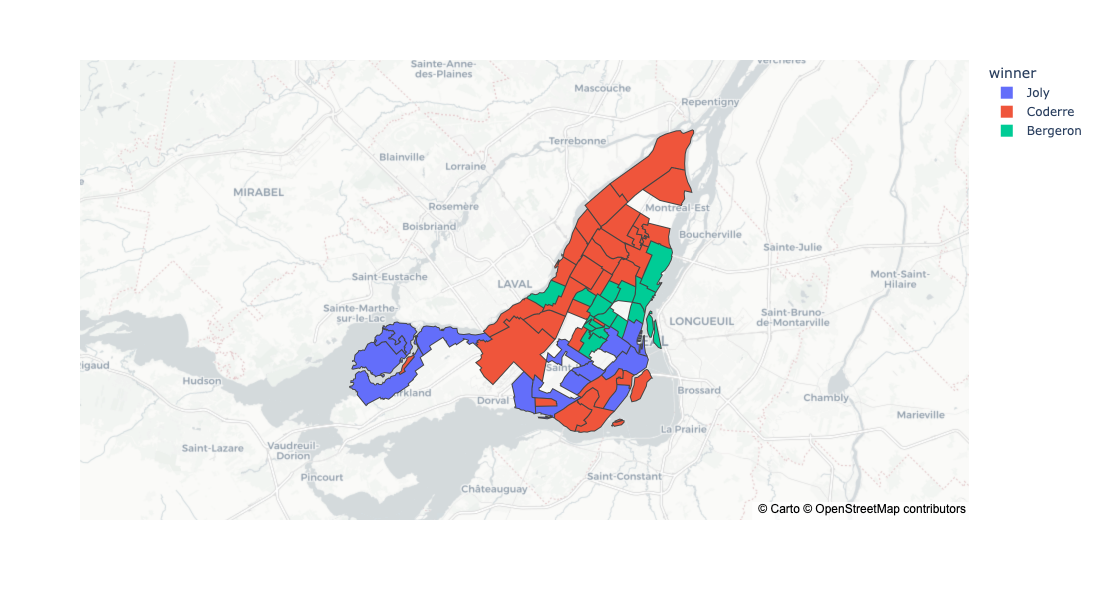

In [40]:

fig = px.choropleth_mapbox(df, 
                           geojson = geojson, 
                           color = "winner",
                           locations = "district", 
                           featureidkey = "properties.district",
                           center = {"lat": 45.5517, "lon": -73.7073},
                           mapbox_style = "carto-positron", 
                           zoom = 9,
                           height = 600)
fig.show()


In [41]:
df['coderre-joly'] = df.Coderre - df.Joly

/var/folders/27/y8zb96dj4rz5c5pd6d84yd440000gn/T/ipykernel_29745/3043446319.py:1: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



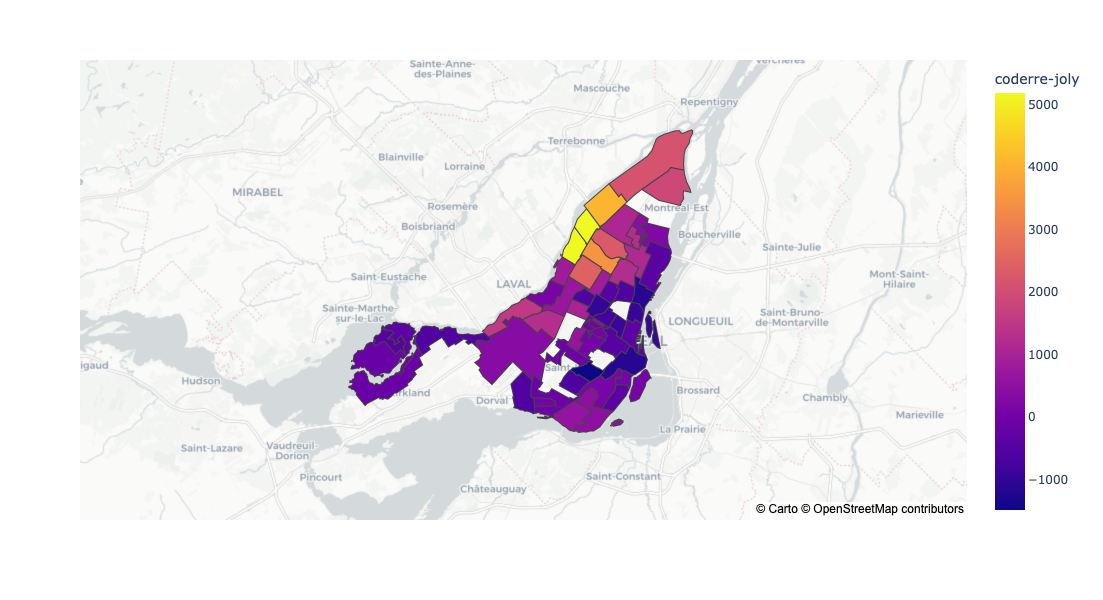

In [42]:
fig = px.choropleth_mapbox(df, 
                           geojson = geojson, 
                           color = "coderre-joly",
                           locations = "district", 
                           featureidkey = "properties.district",
                           center = {"lat": 45.5517, "lon": -73.7073},
                           mapbox_style = "carto-positron", 
                           zoom = 9,
                           height = 600)
fig.show()

- example of outline symbol maps

In [43]:
df = px.data.gapminder()
df

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

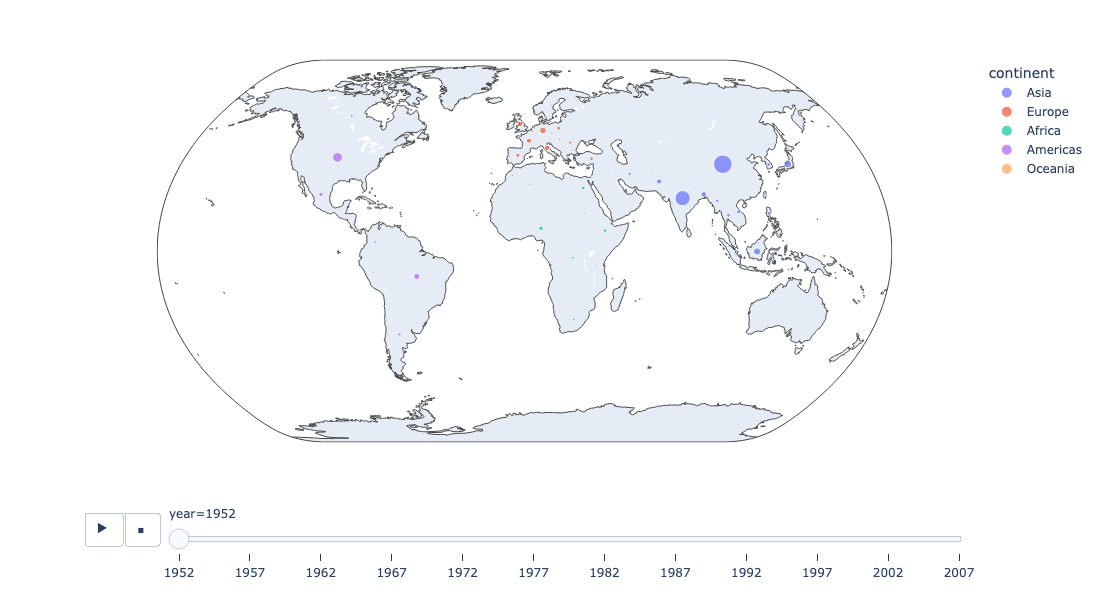

In [44]:
fig = px.scatter_geo(df, 
                     locations = "iso_alpha", 
                     color = "continent", 
                     hover_name = "country", 
                     size = "pop",
                     animation_frame = "year", 
                     projection = "natural earth",
                     height = 600)
fig.show()